In [1]:
import numpy as np
import librosa
import librosa.display

import matplotlib.pyplot as plt

from IPython.display import Audio 

plt.style.use('seaborn-poster')
%matplotlib inline

# Discrete Fourier Transform

## Signals

In [2]:
sr = 100   # sample rate should be small when running and testing manual DFT function but set to at least 16000 if you want to listen to the signals
length = 1 # in seconds

freq1 = 30
freq2 = 220
freq3 = 400

In [3]:
t = np.arange(0, length, 1/sr)

a1 = np.sin(freq1 * 2 * np.pi *t) * 1.
a2 = np.sin(freq2 * 2 * np.pi *t) * .5
a3 = np.sin(freq3 * 2 * np.pi *t) * .25

a_sum = a1+a2+a3

In [4]:
Audio(a_sum, rate=sr)

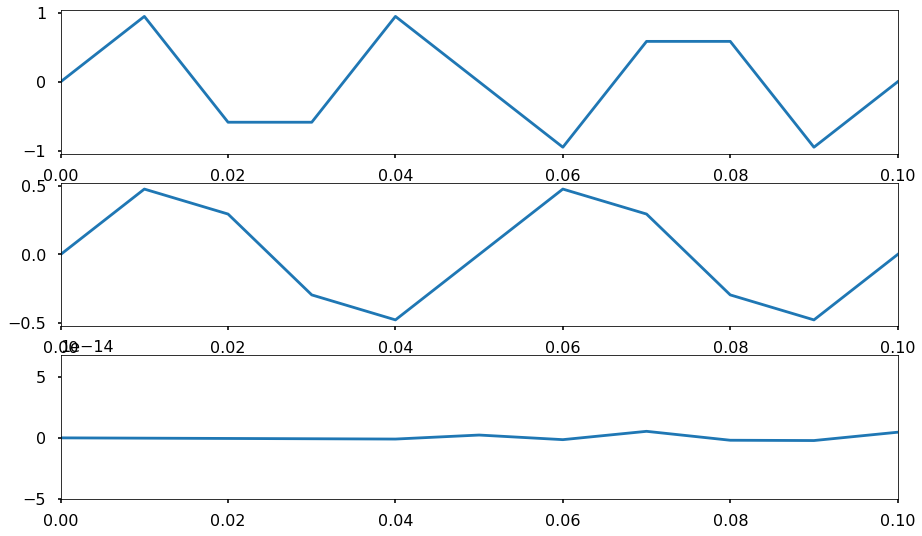

In [5]:
plt.figure(figsize=(15, 9))
plt.subplot(311)
plt.plot(t, a1)
plt.xlim(0, 0.1)
plt.subplot(312)
plt.plot(t, a2)
plt.xlim(0, 0.1)
plt.subplot(313)
plt.plot(t, a3);
plt.xlim(0, 0.1);

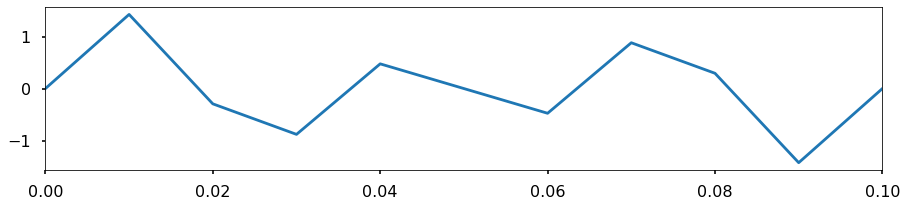

In [6]:
plt.figure(figsize=(15, 3))
plt.plot(t, a_sum);
plt.xlim(0, 0.1);

# Discrete Fourier Transform

<img src="assets/dft.png" />

[1] https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.02-Discrete-Fourier-Transform.html

In [7]:
def DFT(x):
    """
    Function to calculate the 
    discrete Fourier Transform 
    of a 1D real-valued signal x
    
    Very slow.  Not recommend for high sampling rates
    """

    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    
    X = np.dot(e, x)
    
    return X

def DFT_freqs(dft_len, sr):
    n = np.arange(dft_len)
    T = dft_len/sr
    
    return n/T 

### DFT vs FFT

In [8]:
# Basic Discrete Fourier Transform
# X = DFT(a_sum)
# freqs = DFT_freqs(len(a_sum), sr)
# idx = np.argsort(freqs)

# Numpy Fast Fourier Transform
X = np.fft.fft(a_sum)
freqs = np.fft.fftfreq(len(a_sum), 1/sr)
idx = np.argsort(freqs)

# get power spectrum from complex output of DFT/FFT
ps = np.abs(X)**2

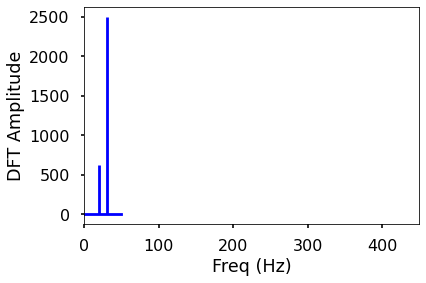

In [9]:
# Plot the Sprectrum
plt.stem(freqs[idx], ps[idx], 'b', markerfmt=' ', basefmt='-b' )
plt.xlim(0, 450)
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude');

In [10]:
%timeit DFT(a_sum)

242 µs ± 11.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [11]:
%timeit np.fft.fft(a_sum)

3.93 µs ± 99.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [12]:
# audio is C major scale
a, sr = librosa.load('assets/guitar_c_major.wav', sr=None)
print(f'SR = {sr}')

t = np.arange(0, len(a)/sr, 1/sr)

SR = 44100


(1.0, 1.5)

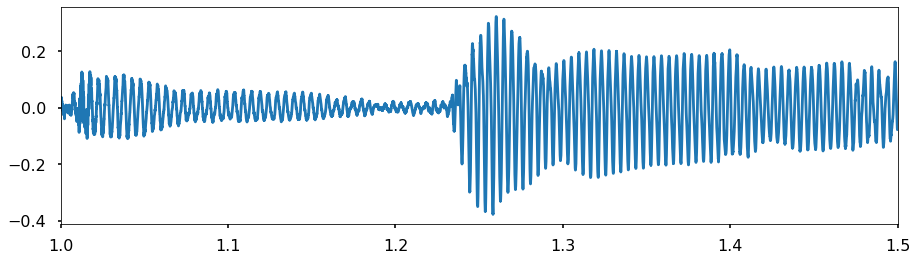

In [13]:
plt.figure(figsize=(15, 4))
plt.plot(t, a)
plt.xlim(1, 1.5)

In [14]:
Audio(a, rate=sr)

In [15]:
# Numpy Fast Fourier Transform
X = np.fft.fft(a)
freqs = np.fft.fftfreq(len(a), 1/sr)
idx = np.argsort(freqs)

# get power spectrum from complex output of DFT/FFT
ps = np.abs(X)**2

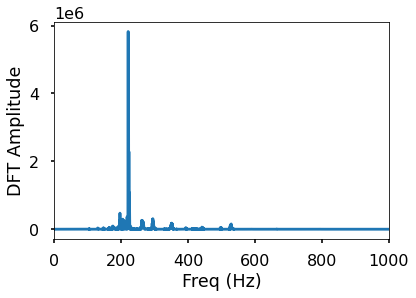

In [16]:
# Plot the Sprectrum
plt.plot(freqs[idx], ps[idx])
plt.xlim(0, 1000)
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude');

## Short Time Fourier Transform

<img src="assets/STFT_Viz2.png" />

Text(0.5, 0, 'Sample')

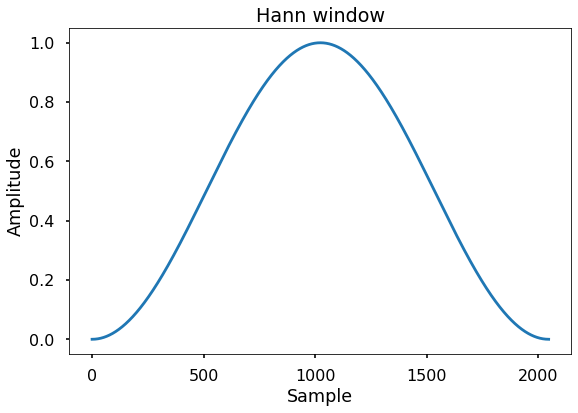

In [17]:
from scipy import signal

window = signal.windows.hann(2048)

plt.figure(figsize=(9,6))
plt.plot(window)
plt.title("Hann window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")

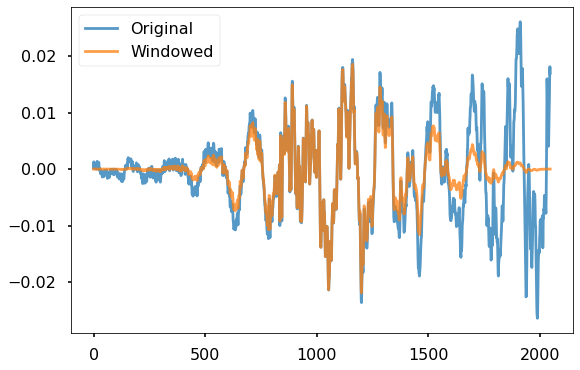

In [18]:
plt.figure(figsize=(9,6))
plt.plot(a[1000:1000+2048], alpha=.75, label='Original')
plt.plot(a[1000:1000+2048] * window, alpha=.75, label='Windowed')
plt.legend();

In [19]:
## STFT with Librosa
X = librosa.stft(a,
                 n_fft=4096,
                 hop_length=2048,
                 win_length=4096,
                 window='hann')
print(X.shape)

(2049, 81)


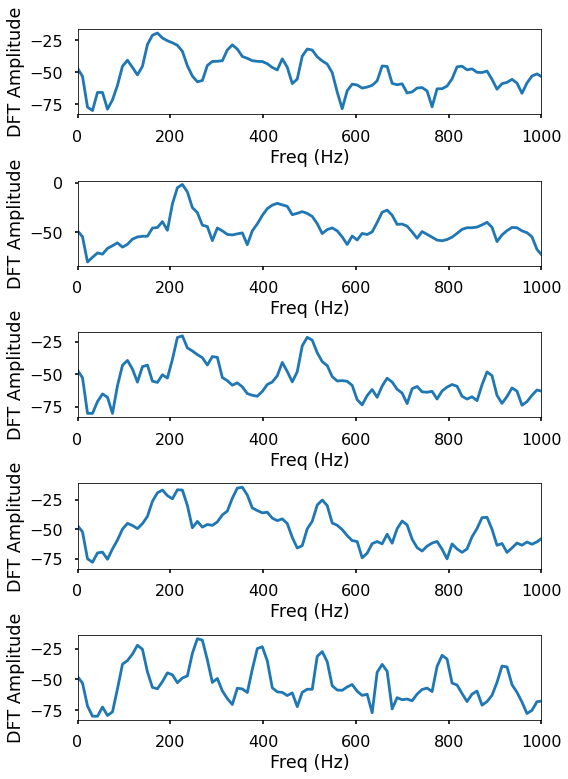

In [20]:
D = librosa.amplitude_to_db(np.abs(X), ref=np.max)

plt.figure(figsize=(8, 12))
frame_hop = 15
freqs = librosa.fft_frequencies(sr=sr, n_fft=4096)

for i in range(1, 6):
    frame = D.T[i*frame_hop]
    
    plt.subplot(610+i)
    plt.plot(freqs, frame)
    plt.xlim(0, 1000)
    plt.xlabel('Freq (Hz)')
    plt.ylabel('DFT Amplitude');
plt.tight_layout();

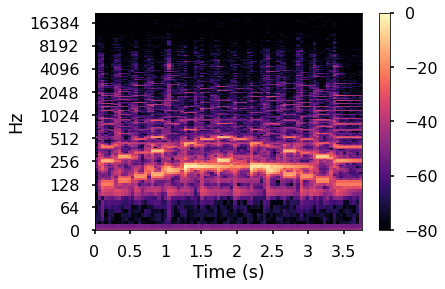

In [21]:
librosa.display.specshow(D, x_axis='s', y_axis='log', sr=sr, hop_length=2048);
plt.colorbar();

## Mel-Cepstral Frequency Coefficients

<img src="assets/mfcc.png" width="500" />

#### Mel Scale

Closer to Human Perception

<img src="assets/melscale.png" width="500" />

In [22]:
import scipy.fftpack

In [23]:
S = librosa.feature.melspectrogram(a, 
                                   sr=sr,
                                   n_fft=4096,
                                   n_mels=256,
                                   hop_length=1024,
                                   win_length=4096,
                                   window='hann')
# M = librosa.feature.mfcc(S=librosa.power_to_db(S), n_mfcc=26)
M = scipy.fftpack.dct(librosa.power_to_db(S), axis=-2, type=2, norm='ortho')[..., :32, :]
M.shape

(32, 162)

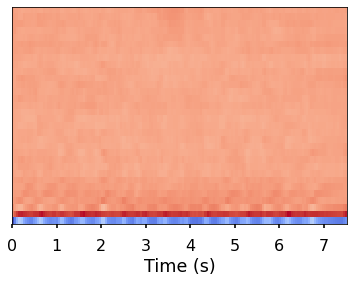

In [24]:
librosa.display.specshow(M, x_axis='s', sr=sr, hop_length=2048);